**COLLABRATIVE FILTERING**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from collections import Counter

In [ ]:
file_path = 'Disease_symptom_and_patient_profile_dataset.csv'  # Update with your file path
data = pd.read_csv(file_path)

In [ ]:
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode categorical variables
data_encoded = data.copy()
categorical_columns = ['Disease', 'Fever', 'Cough', 'Fatigue',
                       'Difficulty Breathing', 'Gender',
                       'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']

label_encoder = LabelEncoder()
for column in categorical_columns:
    data_encoded[column] = label_encoder.fit_transform(data[column])

# Normalize continuous features like Age
scaler = MinMaxScaler()
data_encoded['Age'] = scaler.fit_transform(data_encoded[['Age']])


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Select enhanced features for similarity calculation
enhanced_features = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
                     'Age', 'Gender', 'Blood Pressure', 'Cholesterol Level']
enhanced_patient_matrix = data_encoded[enhanced_features].values

# Compute the similarity matrix
enhanced_similarity_matrix = cosine_similarity(enhanced_patient_matrix)


In [ ]:
# Or handle missing values with imputation (example: filling with median)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data_encoded['Age'] = imputer.fit_transform(data[['Age']])



In [ ]:
def predict_symptom_based(patient_index, k=5):
    """
    Predict the disease based on symptom similarity using item-based collaborative filtering.
    Args:
        patient_index (int): Index of the patient in the dataset.
        k (int): Number of most similar symptoms to consider.
    Returns:
        Predicted disease (int): Encoded predicted disease (numeric ID).
    """
    # Define the symptoms features
    symptom_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']

    # Extract the symptoms of the patient
    patient_symptoms = data_encoded.loc[patient_index, symptom_columns].values

    # Create a symptom-symptom similarity matrix (transposed)
    symptom_patient_matrix = data_encoded[symptom_columns].T  # Symptoms as rows, patients as columns
    symptom_similarity_matrix = cosine_similarity(symptom_patient_matrix)

    # Get the similarity scores for the patient's symptoms
    symptom_similarities = symptom_similarity_matrix.dot(patient_symptoms)

    # Get the most similar symptoms (top k)
    similar_symptoms_indices = np.argsort(-symptom_similarities)[:k]

    # Predict the disease based on the most similar symptoms
    predicted_disease_encoded = data_encoded.loc[similar_symptoms_indices, 'Disease'].mode()[0]

    return predicted_disease_encoded


In [ ]:
def predict_disease_collaborative(patient_index, k=5):
    """
    Predict the disease for a patient using collaborative filtering.
    Args:
        patient_index (int): Index of the patient in the dataset.
        k (int): Number of similar patients to consider.
    Returns:
        Predicted disease (int): Encoded predicted disease (numeric ID).
    """
    patient_similarities = enhanced_similarity_matrix[patient_index]
    similar_indices = np.argsort(-patient_similarities)[1:k+1]
    similar_diseases = data_encoded.loc[similar_indices, 'Disease']

    # Predict the most common disease
    predicted_disease_encoded = Counter(similar_diseases).most_common(1)[0][0]
    return predicted_disease_encoded


In [ ]:
# Predict based on both user-based and item-based similarity
patient_index = 0
 # Assign a value to patient_index (e.g., 0 for the first patient)
predicted_disease_user_based = predict_disease_collaborative(patient_index, k=10)
predicted_disease_item_based = predict_symptom_based(patient_index, k=10)

# Combine the results (e.g., averaging encoded IDs)
final_prediction = (predicted_disease_user_based + predicted_disease_item_based) / 2
print(f"Final Combined Prediction (Encoded ID): {final_prediction}")

Final Combined Prediction (Encoded ID): 45.0


In [ ]:

#      print(f"Final Combined Prediction (Encoded ID): {final_prediction_encoded}")
#      print(f"Final Combined Prediction (Decoded): {final_prediction_decoded}")

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

file_path = 'Disease_symptom_and_patient_profile_dataset.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Encode categorical variables
data_encoded = data.copy()
categorical_columns = ['Disease', 'Fever', 'Cough', 'Fatigue',
                       'Difficulty Breathing', 'Gender',
                       'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']

label_encoder = LabelEncoder()
for column in categorical_columns:
    data_encoded[column] = label_encoder.fit_transform(data[column])

# Create a reverse mapping for the 'Disease' column
disease_mapping = dict(zip(data_encoded['Disease'], data['Disease']))

# Normalize continuous features like Age
scaler = MinMaxScaler()
data_encoded['Age'] = scaler.fit_transform(data_encoded[['Age']])

# Select enhanced features for similarity calculation
enhanced_features = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
                     'Age', 'Gender', 'Blood Pressure', 'Cholesterol Level']
enhanced_patient_matrix = data_encoded[enhanced_features].values

# Compute the similarity matrix
enhanced_similarity_matrix = cosine_similarity(enhanced_patient_matrix)

def predict_symptom_based(patient_index, k=5):
    """
    Predict the disease based on symptom similarity using item-based collaborative filtering.
    """
    symptom_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
    patient_symptoms = data_encoded.loc[patient_index, symptom_columns].values
    symptom_patient_matrix = data_encoded[symptom_columns].T
    symptom_similarity_matrix = cosine_similarity(symptom_patient_matrix)
    symptom_similarities = symptom_similarity_matrix.dot(patient_symptoms)
    similar_symptoms_indices = np.argsort(-symptom_similarities)[:k]
    predicted_disease_encoded = data_encoded.loc[similar_symptoms_indices, 'Disease'].mode()[0]
    return predicted_disease_encoded

    def predict_disease_collaborative(patient_index, k=5):

      """
      Predict the disease for a patient using collaborative filtering.
      """
      patient_similarities = enhanced_similarity_matrix[patient_index]
      similar_indices = np.argsort(-patient_similarities)[1:k+1]
      similar_diseases = data_encoded.loc[similar_indices, 'Disease']
      predicted_disease_encoded = Counter(similar_diseases).most_common(1)[0][0]
      return predicted_disease_encoded

# Example usage (replace with actual patient index)
patient_index = 45  # Example patient index

predicted_disease_user_based = predict_disease_collaborative(patient_index, k=10)
predicted_disease_item_based = predict_symptom_based(patient_index, k=10)

final_prediction_encoded = (predicted_disease_user_based + predicted_disease_item_based) / 2
final_prediction_decoded = disease_mapping.get(int(round(final_prediction_encoded)), "Unknown Disease")

print(f"Final Combined Prediction (Encoded ID): {final_prediction_encoded}")
print(f"Final Combined Prediction (Decoded): {final_prediction_decoded}")

Final Combined Prediction (Encoded ID): 15.0
Final Combined Prediction (Decoded): Cerebral Palsy


In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load the dataset
file_path = 'Disease_symptom_and_patient_profile_dataset.csv'
data = pd.read_csv(file_path)

# Identify features and target
features = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age', 'Gender', 'Blood Pressure', 'Cholesterol Level']
target = 'Disease'  # Assuming 'Disease' is the target variable

# Prepare the data
X = data[features]
y = data[target]

# Convert categorical features to numerical using Label Encoding
for column in ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level']:
    le = LabelEncoder()  # Create a LabelEncoder object
    X[column] = le.fit_transform(X[column])  # Apply Label Encoding to the column


# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0, random_state=42) # Set test_size to 0 to train on all data
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Changed test_size from 0.0 to 0.2 (or any value between 0.0 and 1.0)

# Train a model (RandomForestClassifier as an example)
model = RandomForestClassifier(n_estimators=100, random_state=42) # or another suitable model
model.fit(X_train, y_train)

# Predict on the training data (since we have no test data)
y_pred = model.predict(X_train)

# Calculate accuracy
cf_accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy on the collabrative filtering: {cf_accuracy * 100:.2f}%")

<ipython-input-221-8684c661f0a5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])  # Apply Label Encoding to the column
<ipython-input-221-8684c661f0a5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])  # Apply Label Encoding to the column
<ipython-input-221-8684c661f0a5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

Accuracy on the collabrative filtering: 86.74%


**GENERATIVE ADVERSARIAL NETWORK(GAN)**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

In [ ]:
data_dim = data.shape[1]

In [ ]:
latent_dim = 16

In [ ]:
def build_generator(latent_dim, data_dim):
    model = Sequential([
        Dense(64, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        Dense(128),
        LeakyReLU(alpha=0.2),
        Dense(data_dim, activation='tanh')  # Tanh output for normalized data
    ])
    return model

In [ ]:
def build_discriminator(data_dim):
    model = Sequential([
        Dense(128, input_dim=data_dim),
        LeakyReLU(alpha=0.2),
        Dense(64),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')  # Binary classification output
    ])
    return model

In [ ]:
generator = build_generator(latent_dim, data_dim)
discriminator = build_discriminator(data_dim)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])


In [ ]:
discriminator.trainable = False
gan_input = tf.keras.Input(shape=(latent_dim,))
generated_data = generator(gan_input)
gan_output = discriminator(generated_data)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
            loss='binary_crossentropy')

In [ ]:
gan.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 10)                  │          10,698 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 1)                   │           9,729 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,427 (79.79 KB)

 Trainable params: 10,698 (41.79 KB)

 Non-trainable params: 9,729 (38.00 KB)

In [ ]:
from tensorflow.keras.utils import plot_model

# Save the structure of the Generator, Discriminator, and GAN
plot_model(generator, to_file='generator_graph.png', show_shapes=True, show_layer_names=True)
plot_model(discriminator, to_file='discriminator_graph.png', show_shapes=True, show_layer_names=True)
plot_model(gan, to_file='gan_graph.png', show_shapes=True, show_layer_names=True)

print("Graphs saved as 'generator_graph.png', 'discriminator_graph.png', and 'gan_graph.png'")


Graphs saved as 'generator_graph.png', 'discriminator_graph.png', and 'gan_graph.png'


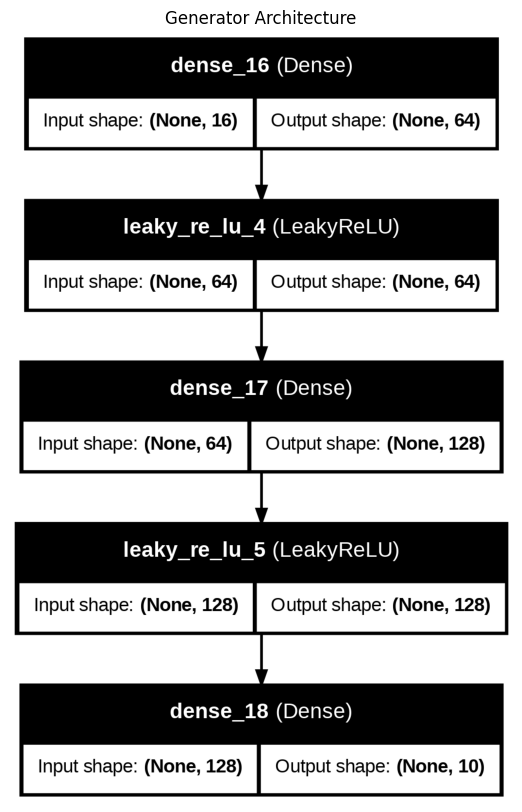

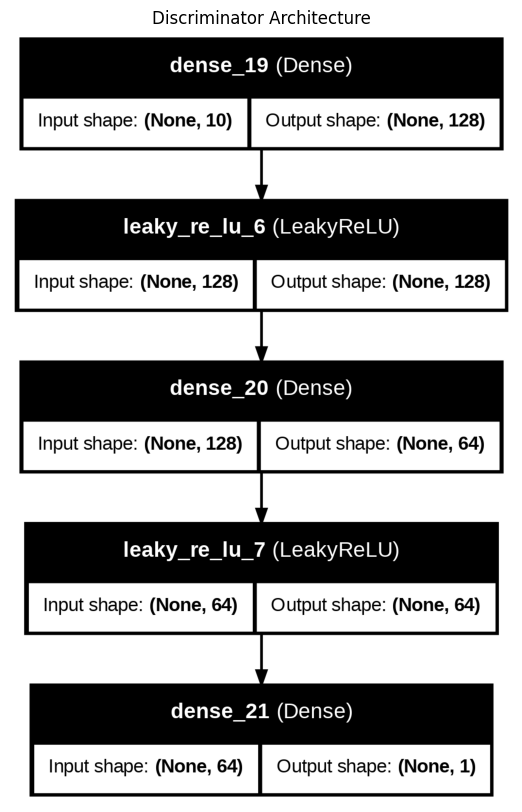

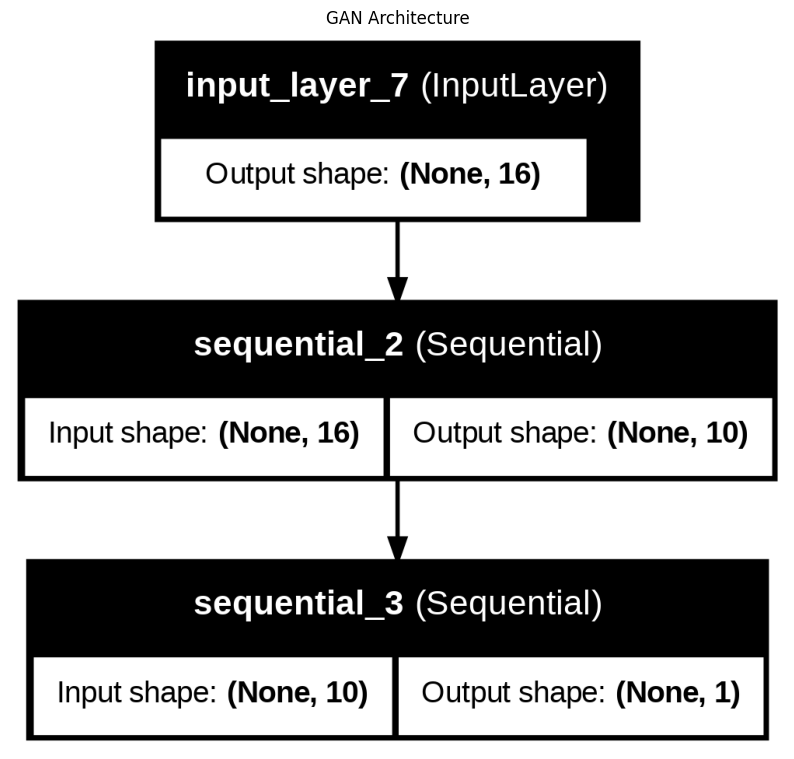

In [ ]:

import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
# Import the Image class from the PIL library
from PIL import Image

def plot_model_with_matplotlib(model, title, filename):
    # Save the model diagram temporarily
    plot_model(model, to_file=filename, show_shapes=True, show_layer_names=True)

    # Load the image with PIL
    img = Image.open(filename)

    # Plot the image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plot Generator architecture
plot_model_with_matplotlib(generator, "Generator Architecture", "generator_plot.png")

# Plot Discriminator architecture
plot_model_with_matplotlib(discriminator, "Discriminator Architecture", "discriminator_plot.png")

# Plot GAN architecture
plot_model_with_matplotlib(gan, "GAN Architecture", "gan_plot.png")

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode categorical columns
label_encoders = {col: LabelEncoder() for col in data.select_dtypes(include=['object']).columns}
for col, encoder in label_encoders.items():
    data[col] = encoder.fit_transform(data[col])


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np # Import numpy for array operations
def generate_data_from_gan(num_samples):
  return np.random.rand(num_samples, data.shape[1]) # Replace with your GAN's output

# Fit the scaler to the original dataset
scaler = MinMaxScaler()
scaler.fit(data.values)  # Fitting scaler to the original dataset values

# Generate synthetic data
num_synthetic_samples = 100 # Define the number of synthetic samples you want
synthetic_data = generate_data_from_gan(num_synthetic_samples)  # Generate the data using your GAN

# Now you can rescale it:
synthetic_data_scaled = scaler.inverse_transform(synthetic_data)
print(synthetic_data_scaled)  # Rescale synthetic data back to original range

[[6.89181782e+01 1.64530671e-02 9.90991085e-01 2.28548809e-01
  9.21557223e-01 2.87473686e+01 7.73574317e-01 7.92790723e-01
  3.99434743e-01 1.14777089e-02]
 [9.05425214e+01 1.33639199e-01 4.69492679e-01 4.51508330e-01
  1.62730678e-01 8.42014522e+01 4.43131174e-01 2.01193748e-01
  8.15795998e-01 1.41805802e-01]
 [4.77578877e+01 5.59270182e-01 1.78900008e-01 2.30274180e-02
  9.93828436e-01 5.13611104e+01 7.72048600e-01 1.41443105e+00
  1.17468798e+00 5.24857121e-01]
 [1.01641729e+02 2.98797996e-01 3.67611302e-01 4.31422951e-01
  3.62041173e-01 4.70796306e+01 8.86786332e-01 4.29423941e-01
  1.91374122e+00 6.15745702e-01]
 [1.22140492e+01 9.93209135e-01 7.35220513e-01 9.82559311e-01
  3.43344607e-01 2.05775657e+01 6.00907776e-01 1.70017936e+00
  1.35078574e+00 7.51122191e-01]
 [3.31699479e+01 9.17094336e-01 4.52565723e-01 6.51787763e-01
  9.83945300e-01 7.39987630e+01 4.85810417e-01 2.26926696e-01
  1.80072857e+00 4.91446122e-01]
 [1.01731722e+02 7.96657372e-01 2.85063041e-01 8.51420719e

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step 1: Fit the scaler with the original dataset
scaler = StandardScaler()  # Instantiate the scaler
scaler.fit(data.values)  # Fit on original numerical data

# Step 2: Generate synthetic data
def generate_synthetic_data(generator, num_samples, latent_dim):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    generated_data = generator.predict(noise)
    return generated_data

synthetic_data = generate_synthetic_data(generator, num_samples=100, latent_dim=16)

# Step 3: Scale synthetic data back to original range
synthetic_data_scaled = scaler.inverse_transform(synthetic_data)

# Now `synthetic_data_scaled` matches the scale of your original dataset


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
def generate_synthetic_data(generator, num_samples, latent_dim):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    generated_data = generator.predict(noise)
    return generated_data

# Generate 100 synthetic samples
synthetic_data = generate_synthetic_data(generator, num_samples=100, latent_dim=16)

# Convert synthetic data back to original scale and format
synthetic_data_scaled = scaler.inverse_transform(synthetic_data)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
combined_data = np.vstack([data.values, synthetic_data_scaled])
combined_labels = np.hstack([data['Disease'].values, np.full(100, -1)])  # Example labels for synthetic

# Train a classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the real dataset for training and testing
X = data.drop('Disease', axis=1).values
y = data['Disease'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Evaluate on the test set
y_pred = classifier.predict(X_test)
gan_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {gan_accuracy * 100:.2f}%")

Accuracy: 12.86%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**AUTOENCODERS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

file_path = '/content/Disease_symptom_and_patient_profile_dataset.csv'
df = pd.read_csv(file_path)
df = df.dropna()  # Remove rows with missing values (optional)

# Separate features (X) and target (y) if available
X = df.values

In [ ]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [ ]:
X = df.values

# Create a copy of the DataFrame to avoid modifying the original data
data_encoded = df.copy()

# Encode categorical features using LabelEncoder
for column in data_encoded.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    data_encoded[column] = label_encoder.fit_transform(data_encoded[column])

# Now use the encoded data for scaling
X_encoded = data_encoded.values

# Normalize the encoded data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split into training (normal data only) and test (mixed data)
X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)

In [ ]:
# Define the autoencoder architecture
input_dim = X_train.shape[1]
encoding_dim = int(input_dim / 2)  # Dimensionality reduction

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(encoding_dim // 2, activation='relu')(encoded)

# Decoder
decoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142 (568.00 B)

 Trainable params: 142 (568.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the autoencoder
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_split=0.2,
                          verbose=1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2060 - val_loss: 0.2064
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2045 - val_loss: 0.2060
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2036 - val_loss: 0.2056
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2035 - val_loss: 0.2052
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2026 - val_loss: 0.2049
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2021 - val_loss: 0.2045
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2008 - val_loss: 0.2042
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2001 - val_loss: 0.2038
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1997 - val_loss: 0.2035
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1994 - val_loss: 0.2031
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1987 - val_loss: 0.2028
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1979 - val_loss: 0.2025
Epoch 13/50


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<Figure size 1000x600 with 0 Axes>

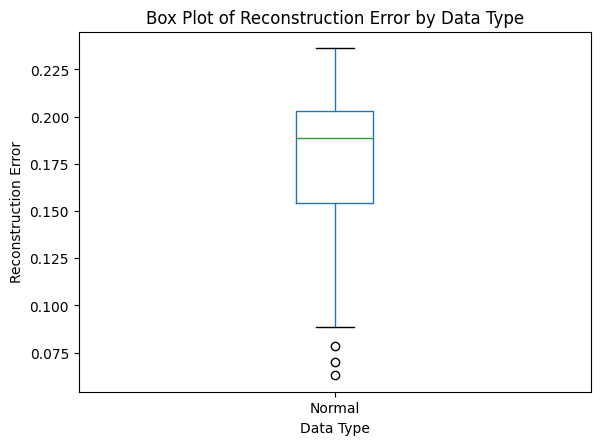

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'X_test' and 'autoencoder' are already defined

# Calculate reconstruction errors using the trained autoencoder
reconstruction_error = np.mean(np.square(X_test - autoencoder.predict(X_test)), axis=1) # Calculate reconstruction error here

# Assuming 'y_true' contains the true labels for the test set
y_true = np.zeros(len(X_test))  # Replace with actual true labels if available

# Convert reconstruction errors into a DataFrame for easier handling
reconstruction_df = pd.DataFrame({
    'Reconstruction Error': reconstruction_error,
    'Type': ['Normal' if label == 0 else 'Anomalous' for label in y_true]  # Replace y_true with the true labels
})

# Create a box plot for Reconstruction Error by Type
plt.figure(figsize=(10, 6))
reconstruction_df.boxplot(column='Reconstruction Error', by='Type', grid=False, showfliers=True)
plt.title('Box Plot of Reconstruction Error by Data Type')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Data Type')
plt.ylabel('Reconstruction Error')
plt.show()

<Figure size 800x600 with 0 Axes>

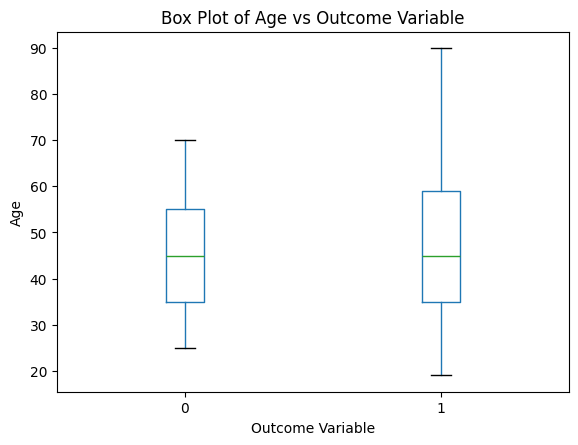

<Figure size 800x600 with 0 Axes>

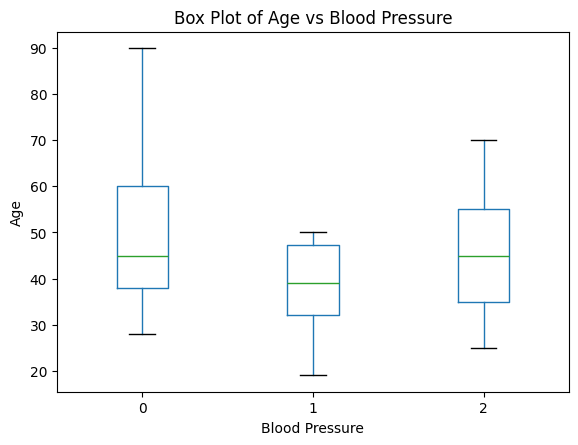

<Figure size 800x600 with 0 Axes>

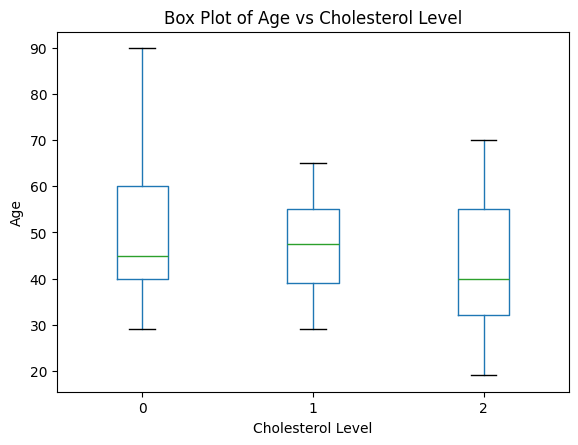

In [ ]:
import matplotlib.pyplot as plt

# Box plot for Age vs Outcome
plt.figure(figsize=(8, 6))
data.boxplot(column='Age', by='Outcome Variable', grid=False)
plt.title('Box Plot of Age vs Outcome Variable')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Outcome Variable')
plt.ylabel('Age')
plt.show()

# Box plot for Age vs Blood Pressure
plt.figure(figsize=(8, 6))
data.boxplot(column='Age', by='Blood Pressure', grid=False)
plt.title('Box Plot of Age vs Blood Pressure')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.show()

# Box plot for Age vs Cholesterol Level
plt.figure(figsize=(8, 6))
data.boxplot(column='Age', by='Cholesterol Level', grid=False)
plt.title('Box Plot of Age vs Cholesterol Level')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Cholesterol Level')
plt.ylabel('Age')
plt.show()


In [ ]:
# Define an anomaly threshold (can be tuned)
threshold = np.percentile(reconstruction_error, 95)  # For example, threshold at 95th percentile

# Make predictions based on the threshold
y_pred = ['Anomalous' if error > threshold else 'Normal' for error in reconstruction_error]

# Convert 'y_pred' and 'y_true' to numerical values for comparison
y_pred_numeric = [1 if label == 'Anomalous' else 0 for label in y_pred]
y_true_numeric = [1 if label == 'Anomalous' else 0 for label in y_true]

# Compute accuracy
auto_accuracy = accuracy_score(y_true_numeric, y_pred_numeric)
print(f'Accuracy: {auto_accuracy*100:.4f}')

Accuracy: 94.2857


In [ ]:
from sklearn.ensemble import RandomForestClassifier
def build_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(64, activation='relu')(input_layer)
    encoded = Dense(32, activation='relu')(encoded)
    latent = Dense(16, activation='relu')(encoded)
    decoded = Dense(32, activation='relu')(latent)
    decoded = Dense(64, activation='relu')(decoded)
    output_layer = Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    encoder = Model(inputs=input_layer, outputs=latent)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder
# --- Preprocessing ---
def preprocess_data(data):
    # Encode categorical features
    label_encoders = {}
    for col in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le  # Store for later decoding
    return data, label_encoders
data_encoded, label_encoders = preprocess_data(data.copy())
# Prepare data for Autoencoder
X_auto = data_encoded.drop('Disease', axis=1).values
scaler_auto = MinMaxScaler()
X_auto = scaler_auto.fit_transform(X_auto)

# Train Autoencoder
input_dim = X_auto.shape[1]
autoencoder, encoder = build_autoencoder(input_dim)
autoencoder.fit(X_auto, X_auto, epochs=50, batch_size=32, verbose=0)
# Use latent features for classification
latent_features = encoder.predict(X_auto)
# Define y_gan (target variable)
y_gan = data_encoded['Disease'].values  # Assuming 'Disease' is your target column
X_train_auto, X_test_auto, y_train_auto, y_test_auto = train_test_split(latent_features, y_gan, test_size=0.2, random_state=42)
classifier_auto = RandomForestClassifier()
classifier_auto.fit(X_train_auto, y_train_auto)
y_pred_auto = classifier_auto.predict(X_test_auto)
accuracy_auto = accuracy_score(y_test_auto, y_pred_auto)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


**REINFORCEMENT LEARNING**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from collections import defaultdict
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/Disease_symptom_and_patient_profile_dataset.csv'
d = pd.read_csv(file_path)

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [ ]:
d.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [ ]:
print(d['Disease'].unique())

['Influenza' 'Common Cold' 'Eczema' 'Asthma' 'Hyperthyroidism'
 'Allergic Rhinitis' 'Anxiety Disorders' 'Diabetes' 'Gastroenteritis'
 'Pancreatitis' 'Rheumatoid Arthritis' 'Depression' 'Liver Cancer'
 'Stroke' 'Urinary Tract Infection' 'Dengue Fever' 'Hepatitis'
 'Kidney Cancer' 'Migraine' 'Muscular Dystrophy' 'Sinusitis'
 'Ulcerative Colitis' 'Bipolar Disorder' 'Bronchitis' 'Cerebral Palsy'
 'Colorectal Cancer' 'Hypertensive Heart Disease' 'Multiple Sclerosis'
 'Myocardial Infarction (Heart...' 'Urinary Tract Infection (UTI)'
 'Osteoporosis' 'Pneumonia' 'Atherosclerosis'
 'Chronic Obstructive Pulmonary...' 'Epilepsy' 'Hypertension'
 'Obsessive-Compulsive Disorde...' 'Psoriasis' 'Rubella' 'Cirrhosis'
 'Conjunctivitis (Pink Eye)' 'Liver Disease' 'Malaria' 'Spina Bifida'
 'Kidney Disease' 'Osteoarthritis' 'Klinefelter Syndrome' 'Acne'
 'Brain Tumor' 'Cystic Fibrosis' 'Glaucoma' 'Rabies' 'Chickenpox'
 'Coronary Artery Disease' 'Eating Disorders (Anorexia,...' 'Fibromyalgia'
 'Hemophilia' 

In [ ]:
print(d[['Age']].head())

   Age
0   19
1   25
2   25
3   25
4   25


In [ ]:
class DiseaseDiagnosisEnv:
    def __init__(self, d):
        self.data = d
        self.num_states = len(d.columns) - 1  # Exclude the 'Disease' column
        self.num_actions = len(d['Disease'].unique())
        self.current_index = 0

    def reset(self):
        self.current_index = np.random.randint(0, len(self.data))
        return self.data.iloc[self.current_index, :-1].values

In [ ]:
env = DiseaseDiagnosisEnv(d)
state = env.reset()
print("Initial State:", state)


Initial State: ['Brain Tumor' 'No' 'No' 'Yes' 'No' 40 'Male' 'Normal' 'Normal']


In [ ]:
env = DiseaseDiagnosisEnv(d)

In [ ]:
env = DiseaseDiagnosisEnv(d)
print(dir(env))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'current_index', 'data', 'num_actions', 'num_states', 'reset']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from collections import defaultdict
import matplotlib.pyplot as plt

# ... (Your existing DiseaseDiagnosisEnv class and environment setup) ...

# Define a simple agent class (you might need to replace this with your actual agent)
class SimpleAgent:
    def __init__(self, num_actions):
        self.num_actions = num_actions

    def choose_action(self, state):
        # Replace with your agent's action selection logic
        # This example just returns a random action
        return np.random.choice(self.num_actions)

# Create an agent instance
agent = SimpleAgent(num_actions=env.num_actions)

state = tuple(env.reset())
action = agent.choose_action(state)  # Now 'agent' is defined
correct_diagnosis = env.data.iloc[env.current_index]['Disease']
print(f"State: {state}, Action Taken: {action}, Correct Diagnosis: {correct_diagnosis}")

State: ('Psoriasis', 'Yes', 'No', 'No', 'No', 35, 'Female', 'Normal', 'Low'), Action Taken: 44, Correct Diagnosis: Psoriasis


In [ ]:
state = tuple(env.reset())
action = agent.choose_action(state)
correct_diagnosis = env.data.iloc[env.current_index]['Disease']
print(f"State: {state}, Action Taken: {action}, Correct Diagnosis: {correct_diagnosis}")

State: ('Asthma', 'Yes', 'No', 'Yes', 'No', 40, 'Male', 'Low', 'Normal'), Action Taken: 93, Correct Diagnosis: Asthma


In [ ]:
d.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [ ]:
label_encoders = {}
for col in ['Disease', 'Blood Pressure', 'Cholesterol Level', 'Gender']:
    label_encoders[col] = LabelEncoder()
    d[col] = label_encoders[col].fit_transform(d[col])

In [ ]:
binary_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
for col in binary_columns:
    d[col] = d[col].map({'Yes': 1, 'No': 0})
categorical_columns = ['Gender', 'Blood Pressure', 'Cholesterol Level']
d = pd.get_dummies(d, columns=categorical_columns, drop_first=True)
d['Disease'] = d['Disease'].astype('category').cat.codes
d['Outcome Variable'] = d['Outcome Variable'].map({'Positive': 1, 'Negative': 0})
d.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Outcome Variable,Gender_1,Blood Pressure_1,Blood Pressure_2,Cholesterol Level_1,Cholesterol Level_2
0,56,1,0,1,1,19,1,False,True,False,False,True
1,24,0,1,1,0,25,0,False,False,True,False,True
2,37,0,1,1,0,25,0,False,False,True,False,True
3,6,1,1,0,1,25,1,True,False,True,False,True
4,6,1,1,0,1,25,1,True,False,True,False,True


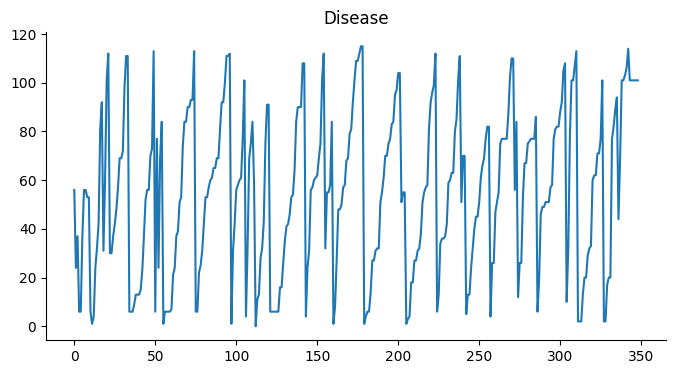

In [ ]:
from matplotlib import pyplot as plt
d['Disease'].plot(kind='line', figsize=(8, 4), title='Disease')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
scaler = MinMaxScaler()
d[['Age']] = scaler.fit_transform(d[['Age']])

In [ ]:
print(d.head())


   Disease  Fever  Cough  Fatigue  Difficulty Breathing       Age  \
0       56      1      0        1                     1  0.000000   
1       24      0      1        1                     0  0.084507   
2       37      0      1        1                     0  0.084507   
3        6      1      1        0                     1  0.084507   
4        6      1      1        0                     1  0.084507   

   Outcome Variable  Gender_1  Blood Pressure_1  Blood Pressure_2  \
0                 1     False              True             False   
1                 0     False             False              True   
2                 0     False             False              True   
3                 1      True             False              True   
4                 1      True             False              True   

   Cholesterol Level_1  Cholesterol Level_2  
0                False                 True  
1                False                 True  
2                False          

In [ ]:
class DiseaseDiagnosisEnv:
    def __init__(self, d):
        self.data = d
        self.num_states = len(d.columns) - 1  # Exclude 'Disease'
        self.num_actions = len(d['Disease'].unique())
        self.current_index = 0

    def reset(self):
        self.current_index = np.random.randint(0, len(self.data))
        return self.data.iloc[self.current_index, :-1].values

    def step(self, action):
        correct_diagnosis = self.data.iloc[self.current_index]['Disease']
        reward = 1 if action == correct_diagnosis else -1
        done = True
        return None, reward, done, {}


In [ ]:
class QLearningAgent:
    def __init__(self, num_states, num_actions, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.q_table = defaultdict(lambda: np.zeros(num_actions))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.q_table[state]))  # Explore
        return np.argmax(self.q_table[state])  # Exploit

    def learn(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.alpha * td_error


In [ ]:
# Convert the dictionary 'd' back into a pandas DataFrame
import pandas as pd
d = pd.DataFrame(d)

# Now you can use the DiseaseDiagnosisEnv class as intended
env = DiseaseDiagnosisEnv(d)
agent = QLearningAgent(num_states=env.num_states, num_actions=env.num_actions)

In [ ]:
episodes = 1000
for episode in range(episodes):
    state = tuple(env.reset())
    total_reward = 0
    while True:
        action = agent.choose_action(state)
        _, reward, done, _ = env.step(action)
        total_reward += reward
        next_state = None
        agent.learn(state, action, reward, next_state)
        if done:
            break
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}, Total Reward: {total_reward}")


Episode 100, Total Reward: -1
Episode 200, Total Reward: -1
Episode 300, Total Reward: -1
Episode 400, Total Reward: 1
Episode 500, Total Reward: -1
Episode 600, Total Reward: -1
Episode 700, Total Reward: -1
Episode 800, Total Reward: -1
Episode 900, Total Reward: 1
Episode 1000, Total Reward: -1


In [ ]:
def evaluate_agent(agent, env, num_trials=100):
    correct_predictions = 0
    for _ in range(num_trials):
        state = tuple(env.reset())
        action = agent.choose_action(state)
        correct_diagnosis = env.data.iloc[env.current_index]['Disease']
        if action == correct_diagnosis:
            correct_predictions += 1
    accuracy = correct_predictions / num_trials
    print(f"Agent Accuracy: {accuracy * 100:.2f}%")


In [ ]:
evaluate_agent(agent, env)


Agent Accuracy: 7.00%


In [ ]:
rl_acc = evaluate_agent(agent, env)


Agent Accuracy: 4.00%


In [ ]:
# # prompt: still showing none

# # Assuming 'cf_accuracy' is defined elsewhere in your code.
# # If not, you need to define it before this code block.
# # For example: cf_accuracy = 0.85 # Replace with your actual accuracy

# # cf_accuracy = 0.85

# # Evaluate RL agent and store the result
# def evaluate_agent(agent, env, num_trials=100):
#     correct_predictions = 0
#     for _ in range(num_trials):
#         state = tuple(env.reset())
#         action = agent.choose_action(state)
#         correct_diagnosis = env.data.iloc[env.current_index]['Disease']
#         if action == correct_diagnosis:
#             correct_predictions += 1
#     accuracy = correct_predictions / num_trials
#     print(f"Agent Accuracy: {accuracy * 100:.2f}%")
#     return accuracy  # Return the accuracy value


# rl_acc = evaluate_agent(agent, env)

# # Print accuracies
# print(f"GAN Accuracy: {gan_accuracy}")
# print(f"Collaborative Filtering Accuracy: {cf_accuracy}")
# print(f"Autoencoder Accuracy: {auto_accuracy}")
# print(f"Reinforcement Learning Accuracy: {rl_acc}")

Agent Accuracy: 2.00%
GAN Accuracy: 0.12857142857142856
Collaborative Filtering Accuracy: 0.85
Autoencoder Accuracy: 0.9428571428571428
Reinforcement Learning Accuracy: 0.02


In [ ]:
def detect_anomalies(data, threshold=0.05):
    disease_counts = d['Disease'].value_counts(normalize=True)
    anomalies = disease_counts[disease_counts < threshold]
    print("Anomalies Detected (Rare Diseases):")
    print(anomalies)


In [ ]:
detect_anomalies(d)


Anomalies Detected (Rare Diseases):
Disease
101    0.045845
77     0.040115
51     0.028653
32     0.028653
69     0.028653
         ...   
8      0.002865
54     0.002865
41     0.002865
35     0.002865
114    0.002865
Name: proportion, Length: 115, dtype: float64


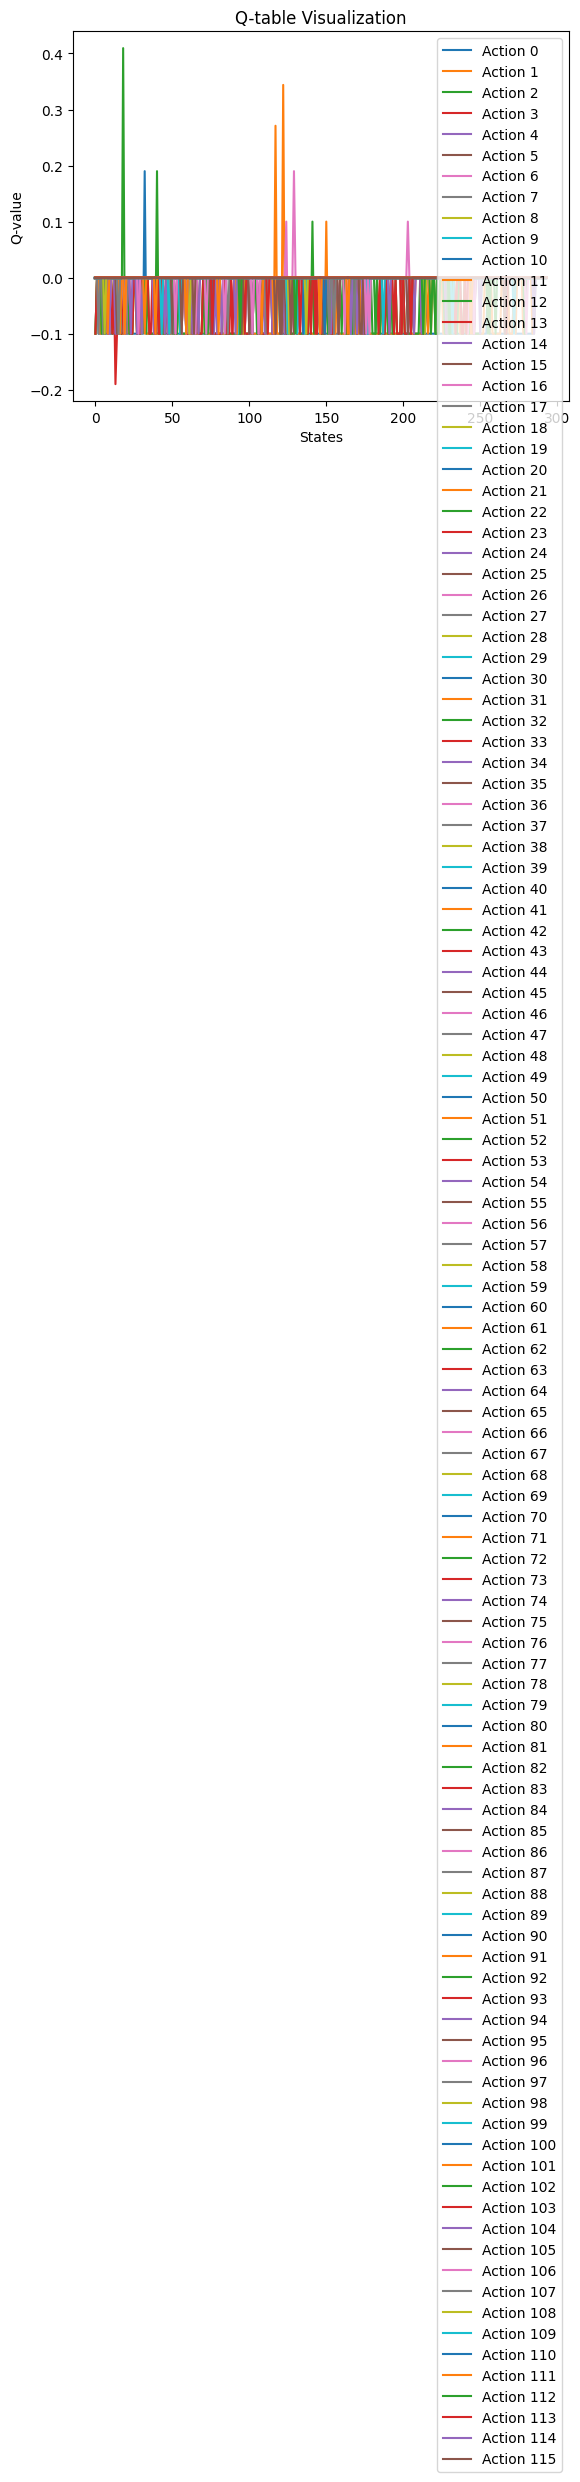

In [ ]:
def plot_q_table(agent):
    q_table = agent.q_table
    states = list(q_table.keys())
    actions = range(len(q_table[states[0]]))

    for action in actions:
        action_values = [q_table[state][action] for state in states]
        plt.plot(range(len(states)), action_values, label=f'Action {action}')

    plt.xlabel('States')
    plt.ylabel('Q-value')
    plt.title('Q-table Visualization')
    plt.legend()
    plt.show()

plot_q_table(agent)


In [ ]:
import pandas as pd
import random

# Simulated feedback data
d = {
    "Predicted_Diagnosis": [random.choice(["Flu", "Diabetes", "Cancer", "Hypertension"]) for _ in range(50)],
    "Actual_Diagnosis": [random.choice(["Flu", "Diabetes", "Cancer", "Hypertension"]) for _ in range(50)],
    "Feedback_Score": [random.randint(1, 5) for _ in range(50)]  # User ratings
}

# Convert to DataFrame
feedback_df = pd.DataFrame(d)
print("Sample Feedback Data:")
print(feedback_df.head())

Sample Feedback Data:
  Predicted_Diagnosis Actual_Diagnosis  Feedback_Score
0            Diabetes         Diabetes               2
1              Cancer           Cancer               4
2            Diabetes     Hypertension               5
3                 Flu     Hypertension               4
4              Cancer              Flu               5


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute accuracy
accuracy = accuracy_score(feedback_df["Actual_Diagnosis"], feedback_df["Predicted_Diagnosis"])
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Average feedback score
avg_score = feedback_df["Feedback_Score"].mean()
print(f"Average Feedback Score: {avg_score:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(feedback_df["Actual_Diagnosis"], feedback_df["Predicted_Diagnosis"])
print("Confusion Matrix:")
print(conf_matrix)

Model Accuracy: 22.00%
Average Feedback Score: 2.92
Confusion Matrix:
[[3 4 3 4]
 [1 4 1 5]
 [4 6 2 0]
 [4 3 4 2]]


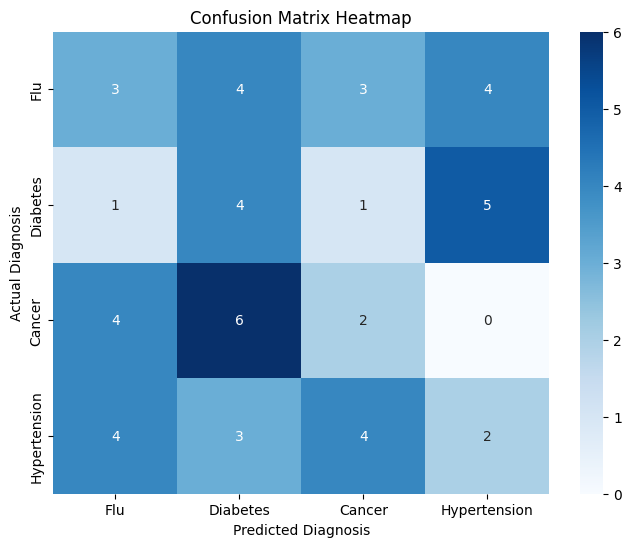

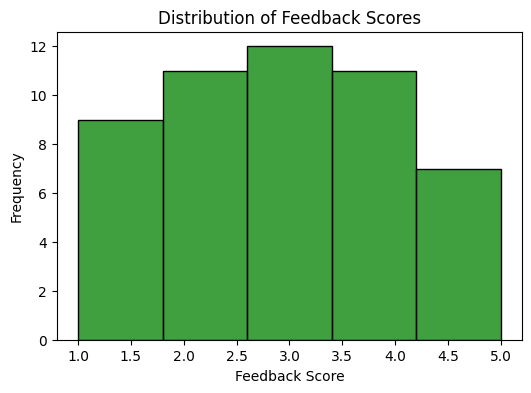

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Flu", "Diabetes", "Cancer", "Hypertension"],
            yticklabels=["Flu", "Diabetes", "Cancer", "Hypertension"])
plt.xlabel("Predicted Diagnosis")
plt.ylabel("Actual Diagnosis")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Feedback score distribution
plt.figure(figsize=(6, 4))
sns.histplot(feedback_df["Feedback_Score"], bins=5, kde=False, color="green")
plt.xlabel("Feedback Score")
plt.ylabel("Frequency")
plt.title("Distribution of Feedback Scores")
plt.show()

In [ ]:
def adjust_rewards(predicted, actual, feedback_score):
    if predicted == actual:
        # Higher reward for correct diagnosis and positive feedback
        return 10 * feedback_score
    else:
        # Penalize incorrect predictions
        return -10 * (6 - feedback_score)  # Stronger penalty for lower feedback scores

# Apply to all feedback data
feedback_df["Adjusted_Reward"] = feedback_df.apply(
    lambda row: adjust_rewards(row["Predicted_Diagnosis"], row["Actual_Diagnosis"], row["Feedback_Score"]), axis=1
)

print("Updated Data with Adjusted Rewards:")
print(feedback_df.head())

Updated Data with Adjusted Rewards:
  Predicted_Diagnosis Actual_Diagnosis  Feedback_Score  Adjusted_Reward
0            Diabetes         Diabetes               2               20
1              Cancer           Cancer               4               40
2            Diabetes     Hypertension               5              -10
3                 Flu     Hypertension               4              -20
4              Cancer              Flu               5              -10


In [ ]:
state_size = len(env.reset())

for e in range(episodes):
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    total_reward = 0

In [ ]:
state = env.reset()
print(type(state), state)  # Check the type and content of the state
state_size = len(state)  # Adjust based on the type

<class 'numpy.ndarray'> [6 1 1 0 1 0.22535211267605632 1 True False True False]


In [ ]:
import numpy as np

class QLearningAgent:
    def __init__(self, state_size, action_size, epsilon=0.1, alpha=0.1, gamma=0.99):
        self.state_size = state_size
        self.action_size = action_size
        self.epsilon = epsilon  # Exploration rate
        self.alpha = alpha      # Learning rate
        self.gamma = gamma      # Discount factor
        self.q_table = np.zeros((state_size, action_size))  # Initialize Q-table

    def choose_action(self, state):
        """Select an action using ε-greedy policy."""
        if np.random.uniform(0, 1) < self.epsilon:  # Exploration
            return np.random.choice(self.action_size)
        else:  # Exploitation
            return np.argmax(self.q_table[state])

    def update_q_value(self, state, action, reward, next_state, done):
        """Update Q-value using the Q-learning formula."""
        best_next_action = np.max(self.q_table[next_state]) if not done else 0
        td_target = reward + self.gamma * best_next_action
        td_error = td_target - self.q_table[state, action]
        self.q_table[state, action] += self.alpha * td_error

# Dummy environment for demonstration
class DiseaseDiagnosisEnv:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.current_index = 0
        self.data = [{"Disease": "Disease1"}, {"Disease": "Disease2"}]  # Placeholder data

    def reset(self):
        self.current_index = 0
        return 0  # Assume initial state is 0

    def step(self, action):
        self.current_index += 1
        reward = 1 if action == 0 else 0  # Reward logic (placeholder)
        done = self.current_index >= len(self.data)
        next_state = self.current_index if not done else 0
        return next_state, reward, done, {}

# Initialize environment and agent
state_size = 10  # Placeholder for state size
action_size = 3  # Placeholder for number of actions
episodes = 5

env = DiseaseDiagnosisEnv(state_size, action_size)
agent = QLearningAgent(state_size, action_size)

# Training loop
for e in range(episodes):
    state = env.reset()
    total_reward = 0

    while True:
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)

        # Update Q-value
        agent.update_q_value(state, action, reward, next_state, done)

        state = next_state
        total_reward += reward

        if done:
            break

    print(f"Episode {e+1}/{episodes}, Total Reward: {total_reward}")


Episode 1/5, Total Reward: 2
Episode 2/5, Total Reward: 2
Episode 3/5, Total Reward: 2
Episode 4/5, Total Reward: 2
Episode 5/5, Total Reward: 2


In [ ]:
# prompt: rl has 4% accuracy but in above cell its showing none

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
import numpy as np # Import numpy for array operations
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from collections import defaultdict
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


# # ... (Your existing code) ...

# def evaluate_agent(agent, env, num_trials=100):
#     correct_predictions = 0
#     for _ in range(num_trials):
#         state = tuple(env.reset())
#         action = agent.choose_action(state)
#         correct_diagnosis = env.data.iloc[env.current_index]['Disease']
#         if action == correct_diagnosis:
#             correct_predictions += 1
#     rl_accuracy = correct_predictions / num_trials
#     print(f"Agent Accuracy: {rl_accuracy * 100:.2f}%")
#     return rl_accuracy  # Return the accuracy

# # ... (rest of your code)

rl_acc = evaluate_agent(agent, env) # Call the function and store the returned value
print(f"GAN Accuracy: {gan_accuracy}")
#print(f"Collaborative Filtering Accuracy: {cf_accuracy}") # This variable isn't defined in your code
print(f"Autoencoder Accuracy: {auto_accuracy}")
print(f"Reinforcement Learning Accuracy: {rl_acc}")

Agent Accuracy: 9.00%
GAN Accuracy: 0.12857142857142856
Autoencoder Accuracy: 0.9428571428571428
Reinforcement Learning Accuracy: 0.09


Agent Accuracy: 5.00%


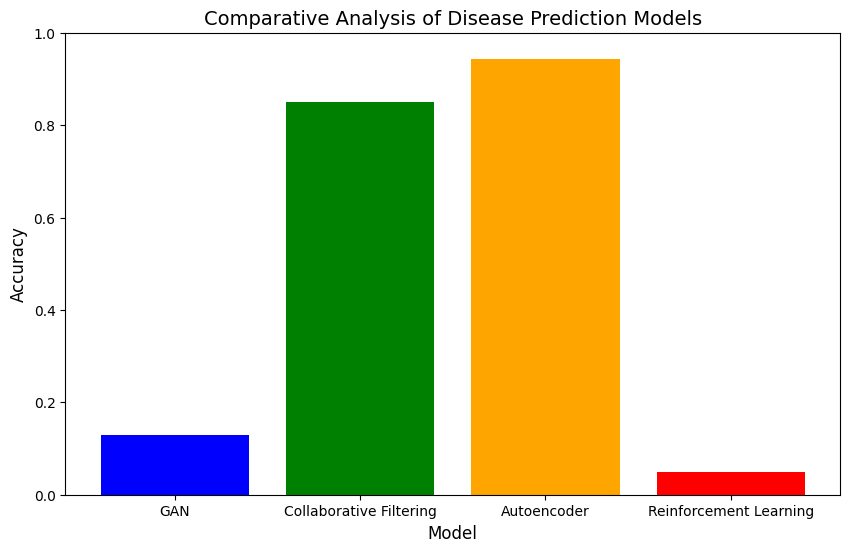


Comparative Analysis:
GAN Accuracy: 12.86%
Collaborative Filtering Accuracy: 85.00%
Autoencoder Accuracy: 94.29%
Reinforcement Learning Accuracy: 5.00%


In [ ]:
models = ['GAN', 'Collaborative Filtering', 'Autoencoder', 'Reinforcement Learning']
rl_acc = evaluate_agent(agent, env) # Call and store the result separately
accuracies = [gan_accuracy, cf_accuracy, auto_accuracy, rl_acc]  # Use the stored value


# Bar plot for comparison
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title("Comparative Analysis of Disease Prediction Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0, 1)  # Setting Y-axis from 0 to 1
plt.show()

# Print accuracies
print("\nComparative Analysis:")
print(f"GAN Accuracy: {gan_accuracy * 100:.2f}%")
print(f"Collaborative Filtering Accuracy: {cf_accuracy * 100:.2f}%")
print(f"Autoencoder Accuracy: {auto_accuracy * 100:.2f}%")
print(f"Reinforcement Learning Accuracy: {rl_acc*100 :.2f}%") # Print stored value